# Analysis of global results

In [1]:
from evaluation_utils import read_global_results, unpivot_baseline_model, unpivot_ssl_model, read_multiple_global_results
from constants import MODE_1_PROCESSED_DIR, MODE_2_3_PROCESSED_DIR, TEST_METRIC, ENCODERS, TRAINING_SCHEMES, SSL_MODELS, BASELINES, AUXILIARY_ALL,\
    CONTRAST_ALL, HYBRID_ALL, GENERATION_ALL, BASELINES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Mode 1 and 2/3 raw
data = read_multiple_global_results(experiments=[
    ('Mode 1', MODE_1_PROCESSED_DIR),
    ('Mode 2/3', MODE_2_3_PROCESSED_DIR)
])

# SSL results
df_ssl = unpivot_ssl_model(df=data, suffix=TEST_METRIC, ssl_models=SSL_MODELS, encoders=ENCODERS, training_schemes=TRAINING_SCHEMES)
df_baseline = unpivot_baseline_model(df=data, suffix=TEST_METRIC, baseline_models=BASELINES, training_schemes=TRAINING_SCHEMES)

1.ndjson
2.ndjson
3.ndjson
4.ndjson
5.ndjson
6.ndjson
7.ndjson
8.ndjson
9.ndjson
10.ndjson
11.ndjson
concatenating
1.ndjson
2.ndjson
3.ndjson
4.ndjson
5.ndjson
6.ndjson
7.ndjson
8.ndjson
9.ndjson
10.ndjson
11.ndjson
12.ndjson
13.ndjson
14.ndjson
15.ndjson
16.ndjson
concatenating


# 

# Overall model results in each mode

In [7]:

grps_ssl = df_ssl.groupby(['SSL_model', 'Experiment'])
grps_baseline = df_baseline.groupby(['Baseline_model', 'Experiment'])
data_points = []
for (model, experiment), v in pd.concat([df_ssl.groupby(['SSL_model', 'Experiment']), df_baseline.groupby(['Baseline_model', 'Experiment'])]):
    data = v[TEST_METRIC]
    data_points += [data.values]

# for (model, experiment), v in grps_baseline:
#     data = v[TEST_METRIC]
#     data_points += [data.values]


In [10]:
[GENERATION_ALL, AUXILIARY_ALL, CONTRAST_ALL, HYBRID_ALL].reverse()

(0.0, 57.0)

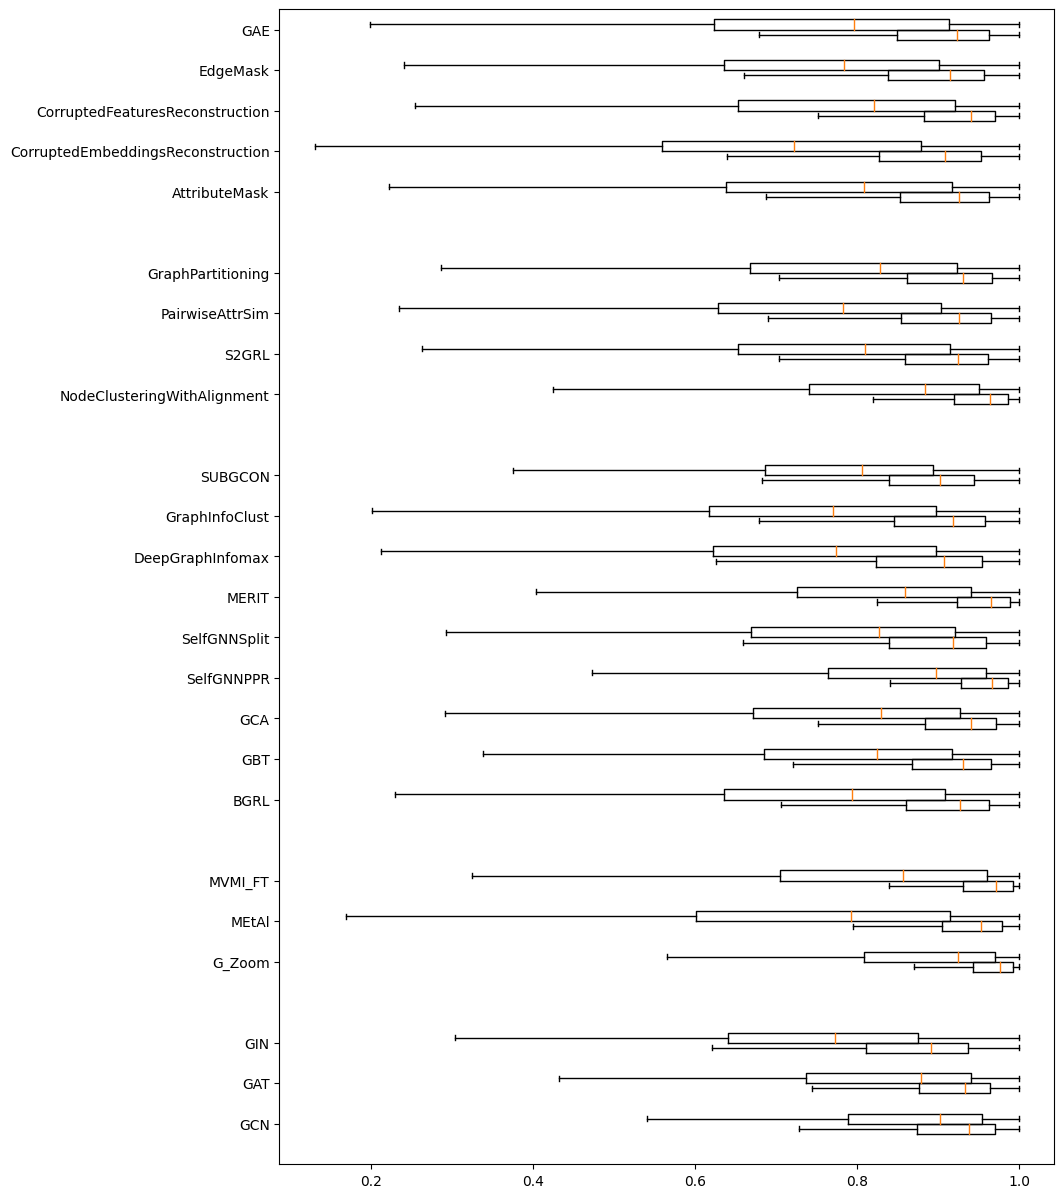

In [22]:
_, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 15))

model_offset = 2
category_offset = 4



# Build axis positions
model_positions = [GENERATION_ALL, AUXILIARY_ALL, CONTRAST_ALL, HYBRID_ALL]; model_positions.reverse()
a = [(model, (idx * model_offset)) for (idx, model) in enumerate(BASELINES, start=1)]
b = [(model, (idx * model_offset) + a[-1][1] + category_offset) for (idx, model) in enumerate(model_positions[0])]
c = [(model, (idx * model_offset) + b[-1][1] + category_offset) for (idx, model) in enumerate(model_positions[1])]
d = [(model, (idx * model_offset) + c[-1][1] + category_offset) for (idx, model) in enumerate(model_positions[2])]
e = [(model, (idx * model_offset) + d[-1][1] + category_offset) for (idx, model) in enumerate(model_positions[3])]
y_axis_dict = dict(a + b + c + d + e) # Map model -> y axis position
y_axis_experiment_dict = { 'Mode 1': 0.25, 'Mode 2/3': -0.25 }

# data_points = []
positions = []
for (model, experiment), v in df_ssl.groupby(['SSL_model', 'Experiment']):
    data = v[TEST_METRIC]
    data_points += [data.values]
    positions += [y_axis_dict[model] + y_axis_experiment_dict[experiment]]

for (model, experiment), v in df_baseline.groupby(['Baseline_model', 'Experiment']):
    positions += [y_axis_dict[model] + y_axis_experiment_dict[experiment]]

axs.boxplot(data_points, notch=False, vert=False, showfliers=False,  positions=positions)


# Build dotted line to separate baselines
baseline_dotted_separator_y = (max([y for (_, y) in b]) - max([y for (_, y) in a])) // 2

axs.set_yticks([*y_axis_dict.values()])
axs.set_yticklabels([*y_axis_dict.keys()])
axs.set_ylim(0, max(y_axis_dict.values()) + 1)


In [19]:
baseline_dotted_separator_y = (max([y for (_, y) in b]) - max([y for (_, y) in a])) // 2

4

# Encoder results

In [9]:
grp = df_ssl.groupby(['SSL_category', 'Training_scheme', 'Encoder', 'Experiment'])
encoder_mean = grp[TEST_METRIC].mean().reset_index()
encoder_std = grp[TEST_METRIC].std().reset_index()

In [70]:
def create_encoder_latex_table(df_ssl_category_means, df_ssl_category_stds):
    for mode in ['Mode 1', 'Mode 2/3']:
        mode_res = []
        print(mode)
        
        for training_Scheme in ['PF', 'URL', 'JL']:
            for encoder in ['GCN', 'GAT', 'GIN']:
                query = lambda df: (df.Training_scheme == training_Scheme) & (df.Encoder == encoder) & (df.Experiment == mode)
                mean = df_ssl_category_means.loc[query(df_ssl_category_means), TEST_METRIC].values
                std = df_ssl_category_stds.loc[query(df_ssl_category_stds), TEST_METRIC].values
                assert (len(mean) == 1) and (len(std) == 1)
                mode_res += [f'${mean[0]:.2f}\pm{std[0]:.2f}$ ']
        print('& '.join(mode_res))

## Auxiliary-property based

In [71]:
encoder_mean[encoder_mean.SSL_category == AUXILIARY_CATEGORY]

,SSL_category,Training_scheme,Encoder,Experiment,test_rocauc_ovr
0,Auxiliary-property based,JL,GAT,Mode 1,0.793850
1,Auxiliary-property based,JL,GAT,Mode 2/3,0.917287
2,Auxiliary-property based,JL,GCN,Mode 1,0.810560
3,Auxiliary-property based,JL,GCN,Mode 2/3,0.910199
4,Auxiliary-property based,JL,GIN,Mode 1,0.738649
5,Auxiliary-property based,JL,GIN,Mode 2/3,0.880746
6,Auxiliary-property based,PF,GAT,Mode 1,0.825968
7,Auxiliary-property based,PF,GAT,Mode 2/3,0.923939
8,Auxiliary-property based,PF,GCN,Mode 1,0.852304
9,Auxiliary-property based,PF,GCN,Mode 2/3,0.914073


In [72]:
create_encoder_latex_table(encoder_mean[encoder_mean.SSL_category == AUXILIARY_CATEGORY], encoder_std[encoder_std.SSL_category == AUXILIARY_CATEGORY])

Mode 1
$0.85\pm0.14$ & $0.83\pm0.14$ & $0.76\pm0.14$ & $0.81\pm0.14$ & $0.81\pm0.13$ & $0.71\pm0.15$ & $0.81\pm0.16$ & $0.79\pm0.16$ & $0.74\pm0.16$ 
Mode 2/3
$0.91\pm0.09$ & $0.92\pm0.08$ & $0.88\pm0.11$ & $0.91\pm0.10$ & $0.91\pm0.10$ & $0.88\pm0.11$ & $0.91\pm0.09$ & $0.92\pm0.08$ & $0.88\pm0.10$ 


## Generation based

In [13]:
encoder_mean[encoder_mean.SSL_category == GENERATION_BASED_CATEGORY]

,SSL_category,Training_scheme,Encoder,Experiment,test_rocauc_ovr
36,Generation based,JL,GAT,Mode 1,0.749987
37,Generation based,JL,GAT,Mode 2/3,0.907446
38,Generation based,JL,GCN,Mode 1,0.763364
39,Generation based,JL,GCN,Mode 2/3,0.897827
40,Generation based,JL,GIN,Mode 1,0.686522
41,Generation based,JL,GIN,Mode 2/3,0.863221
42,Generation based,PF,GAT,Mode 1,0.822596
43,Generation based,PF,GAT,Mode 2/3,0.913516
44,Generation based,PF,GCN,Mode 1,0.846950
45,Generation based,PF,GCN,Mode 2/3,0.906145


## Contrast based

In [14]:
encoder_mean[encoder_mean.SSL_category == CONTRAST_BASED]

,SSL_category,Training_scheme,Encoder,Experiment,test_rocauc_ovr
18,Contrast based,JL,GAT,Mode 1,0.783036
19,Contrast based,JL,GAT,Mode 2/3,0.909829
20,Contrast based,JL,GCN,Mode 1,0.809396
21,Contrast based,JL,GCN,Mode 2/3,0.910629
22,Contrast based,JL,GIN,Mode 1,0.704184
23,Contrast based,JL,GIN,Mode 2/3,0.865129
24,Contrast based,PF,GAT,Mode 1,0.823247
25,Contrast based,PF,GAT,Mode 2/3,0.914419
26,Contrast based,PF,GCN,Mode 1,0.848946
27,Contrast based,PF,GCN,Mode 2/3,0.915207


## Hybrid

In [15]:
encoder_mean[encoder_mean.SSL_category == HYBRID_CATEGORY]

,SSL_category,Training_scheme,Encoder,Experiment,test_rocauc_ovr
54,Hybrid,JL,GAT,Mode 1,0.776496
55,Hybrid,JL,GAT,Mode 2/3,0.943562
56,Hybrid,JL,GCN,Mode 1,0.798194
57,Hybrid,JL,GCN,Mode 2/3,0.935838
58,Hybrid,JL,GIN,Mode 1,0.728490
59,Hybrid,JL,GIN,Mode 2/3,0.926338
60,Hybrid,PF,GAT,Mode 1,0.862841
61,Hybrid,PF,GAT,Mode 2/3,0.943636
62,Hybrid,PF,GCN,Mode 1,0.885531
63,Hybrid,PF,GCN,Mode 2/3,0.942678


# Increase in performance

,test_rocauc_ovr,pretext_weight,SSL_model,Encoder,Training_scheme,Graph_ID
0,0.949540,None,AttributeMask,GCN,PF,0
1,0.984346,None,AttributeMask,GCN,PF,1
2,0.775972,None,AttributeMask,GCN,PF,4
3,0.763285,None,AttributeMask,GCN,PF,5
4,0.978847,None,AttributeMask,GCN,PF,6
...,...,...,...,...,...,...
16748248,0.953252,1,MVMI_FT,GIN,JL,99995
16748249,0.727067,50,MVMI_FT,GIN,JL,99996
16748250,0.657303,50,MVMI_FT,GIN,JL,99997
16748251,0.863095,10,MVMI_FT,GIN,JL,99998
